In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [31]:
# Load your dataset of cities with their coordinates
def load_dataset(filename):
    data = np.loadtxt(filename, delimiter=',')
    return data
filename = "dataset/large.csv"
cities = load_dataset(filename)
num_cities = len(cities)

In [32]:
# Calculate Euclidean distance between two cities to use it to calc the total distance later on 
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

In [33]:
# function that find the nearest neighbor for a city 
def nearest_neighbor_initial_route(cities, start_city):
    num_cities = len(cities)
    current_city = start_city
    unvisited_cities = set(range(num_cities))
    route = [current_city]
    unvisited_cities.remove(current_city)

    while unvisited_cities:
        nearest_city = min(unvisited_cities, key=lambda city: distance(cities[current_city], cities[city]))
        route.append(nearest_city)
        unvisited_cities.remove(nearest_city)
        current_city = nearest_city
    
    return route


In [34]:
def total_distance(route, cities):
    total = 0
    num_cities = len(route)
    for i in range(num_cities):
        total += distance(cities[route[i]], cities[route[(i+1) % num_cities]])
    total += distance(cities[route[-1]], cities[route[0]])
    return total


In [35]:
class Particle:
    def __init__(self, initial_route):
        self.position = initial_route
        self.velocity = [0] * len(initial_route)
        self.best_position = initial_route
        self.best_fitness = total_distance(initial_route, cities)


def initialize_particles(num_particles):
    particles = []
    num_cities = len(cities)
    city_indices = list(range(num_cities))  # Create a list of city indices
    random.shuffle(city_indices)  # Shuffle the city indices

    for i in range(num_particles):
        start_city_index = city_indices[i % num_cities]  # Ensure that each particle gets a unique start city
        initial_route = nearest_neighbor_initial_route(cities, start_city_index)
        particle = Particle(initial_route)
        particles.append(particle)
    return particles


def initialize_particles(num_particles, initialization_approach='random'):
    particles = []
    num_cities = len(cities)
    city_indices = list(range(num_cities))  # Create a list of city indices
    random.shuffle(city_indices)  # Shuffle the city indices

    for i in range(num_particles):
        if initialization_approach == 'random':
            initial_route = random.sample(range(num_cities), num_cities)
        elif initialization_approach == 'nearest_neighbor':
            start_city_index = city_indices[i % num_cities]  # Ensure that each particle gets a unique start city
            initial_route = nearest_neighbor_initial_route(cities, start_city_index)
        else:
            raise ValueError("Invalid initialization approach. Choose from 'random' or 'nearest_neighbor'.")

        particle = Particle(initial_route)
        particles.append(particle)
    return particles


def update_velocity(particle, global_best_position, inertia_weight, cognitive_weight, social_weight):
    for i in range(len(particle.position)):
        cognitive_component = cognitive_weight * random.random() * (particle.best_position[i] - particle.position[i])
        social_component = social_weight * random.random() * (global_best_position[i] - particle.position[i])
        particle.velocity[i] = inertia_weight * particle.velocity[i] + cognitive_component + social_component


def update_position(particle):
    num_cities = len(particle.position)
    for i in range(num_cities):
        # Update position based on velocity
        particle.position[i] = (particle.position[i] + int(round(particle.velocity[i]))) % num_cities


def crowding_penalty(particles, crowding_factor):
    num_particles = len(particles)
    num_dimensions = len(particles[0].position)
    
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            distance_ij = sum((particles[i].position[d] - particles[j].position[d]) ** 2 for d in range(num_dimensions)) ** 0.5
            crowding_penalty_ij = max(0, 1 - distance_ij / crowding_factor)
            
            # Reduce fitness of particles based on crowding penalty
            particles[i].fitness *= crowding_penalty_ij
            particles[j].fitness *= crowding_penalty_ij

def pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight, crowding_factor,intia_type):
    particles = initialize_particles(num_particles,intia_type)
    global_best_position = min(particles, key=lambda p: p.best_fitness).best_position
    global_best_fitness = total_distance(global_best_position, cities)

    for _ in range(max_iterations):
        # Evaluate fitness
        for particle in particles:
            particle.fitness = 1 / (total_distance(particle.position, cities) + 1)  # Add 1 to avoid division by zero
        
        # Apply crowding penalty
        crowding_penalty(particles, crowding_factor)
        
        for particle in particles:
            update_velocity(particle, global_best_position, inertia_weight, cognitive_weight, social_weight)
            update_position(particle)
            current_fitness = total_distance(particle.position, cities)

            # Update personal best if necessary
            if current_fitness < particle.best_fitness:
                particle.best_fitness = current_fitness
                particle.best_position = particle.position

            # Update global best if necessary
            if current_fitness < global_best_fitness:
                global_best_fitness = current_fitness
                global_best_position = particle.position

    return global_best_position, global_best_fitness




In [36]:
 # loading the dataset

filename = "dataset/large.csv" 
cities = load_dataset(filename)   


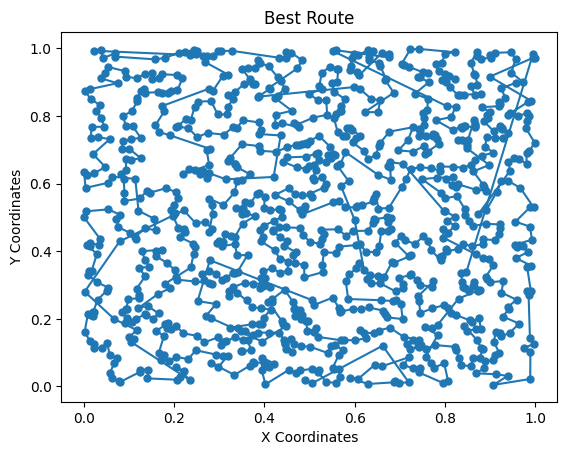

Best route found: [363, 649, 395, 245, 325, 183, 733, 617, 107, 760, 748, 390, 328, 89, 639, 237, 809, 181, 318, 553, 303, 991, 424, 849, 616, 869, 175, 969, 239, 422, 30, 33, 673, 504, 222, 566, 720, 529, 569, 732, 371, 98, 426, 153, 719, 148, 32, 805, 635, 73, 641, 208, 173, 388, 313, 164, 526, 912, 545, 958, 14, 659, 151, 99, 632, 431, 62, 511, 887, 357, 816, 198, 595, 165, 510, 217, 432, 973, 81, 185, 147, 701, 934, 916, 136, 72, 638, 251, 892, 607, 250, 704, 717, 159, 26, 74, 500, 508, 786, 241, 35, 791, 381, 490, 825, 992, 16, 646, 876, 377, 34, 937, 670, 637, 233, 866, 939, 93, 824, 376, 770, 691, 53, 729, 267, 160, 346, 340, 759, 775, 450, 48, 593, 999, 943, 29, 783, 444, 794, 471, 975, 486, 456, 489, 140, 712, 611, 323, 530, 743, 613, 343, 634, 896, 761, 71, 685, 550, 24, 374, 928, 261, 329, 963, 437, 139, 244, 519, 295, 44, 899, 987, 242, 128, 551, 368, 265, 460, 326, 369, 413, 167, 680, 470, 777, 852, 412, 653, 727, 535, 335, 845, 946, 560, 188, 596, 658, 373, 80, 951, 110, 

In [37]:
# We here set the intialization particles method to be nearest_neighbor to see the output the algorithm will give and then see how it will do with other intilization method ( random )
# and particles to be 20 

num_particles = 20                 # Setting the number of populations 
max_iterations = 100               # Setting the number of iterations
inertia_weight = 0.7               # Setting the inertia weight
cognitive_weight = 1.5             # Setting the Cognitive weight
social_weight = 1.5                # Setting the social weight
crowding_factor = 10               # parameter to control the strength of crowding


# Using PSO algo with using nearest neighbor to help intializing smarter particles routes to start with 
best_route, best_distance = pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight,crowding_factor,"nearest_neighbor")

with open("./image/best_routePSo.txt", "w") as f:

    f.write("Distance: {}".format(best_distance))
    
# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.savefig('./image/best_routePSo.png')
plt.show()

print("Best route found:", best_route)
print("Distance of the best route:", best_distance)

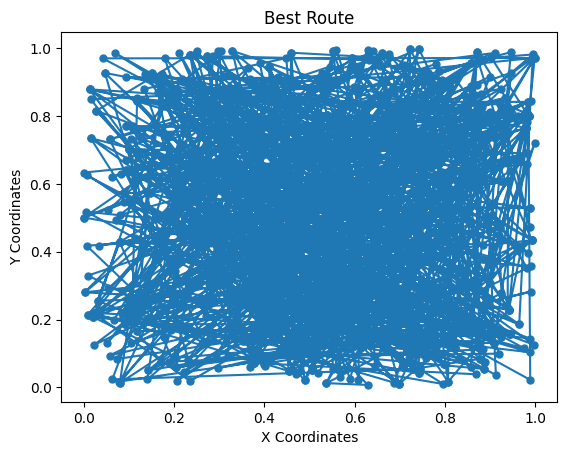

Best route found: [465, 668, 206, 389, 803, 761, 566, 78, 709, 184, 168, 721, 202, 71, 320, 858, 280, 924, 247, 995, 183, 492, 672, 657, 690, 220, 520, 250, 651, 462, 538, 395, 593, 542, 308, 675, 499, 740, 227, 677, 515, 568, 31, 695, 95, 470, 880, 714, 493, 457, 936, 41, 852, 563, 492, 938, 981, 594, 848, 979, 180, 434, 259, 301, 413, 317, 488, 748, 892, 703, 410, 205, 436, 19, 771, 296, 503, 527, 9, 788, 751, 902, 742, 156, 383, 871, 98, 772, 30, 506, 656, 756, 383, 719, 375, 752, 868, 818, 10, 566, 466, 382, 393, 643, 416, 8, 549, 613, 253, 25, 140, 417, 434, 865, 826, 192, 459, 796, 458, 326, 677, 925, 487, 833, 108, 395, 914, 460, 157, 890, 662, 133, 349, 752, 290, 539, 139, 963, 548, 356, 719, 573, 610, 527, 947, 782, 638, 795, 874, 701, 998, 630, 711, 495, 454, 61, 902, 656, 306, 203, 376, 835, 405, 378, 341, 550, 339, 970, 344, 553, 992, 755, 385, 672, 749, 43, 385, 646, 656, 609, 427, 600, 632, 454, 954, 834, 112, 600, 589, 375, 528, 35, 662, 560, 601, 740, 630, 421, 899, 531

In [38]:
# This time we set the intialization particles method to be random to see the effect it does on the algorithm
# and particles to be 20 


num_particles = 20                 # Setting the number of populations 
max_iterations = 100               # Setting the number of iterations
inertia_weight = 0.7               # Setting the inertia weight
cognitive_weight = 1.5             # Setting the Cognitive weight
social_weight = 1.5                # Setting the social weight
crowding_factor = 10               # parameter to control the strength of crowding


# Using PSO algo with using random intializing to see how much of differnt it will make to our algorithm output
best_route, best_distance = pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight,crowding_factor,"random")

# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.show()

print("Best route found:", best_route)
print("Distance of the best route:", best_distance)

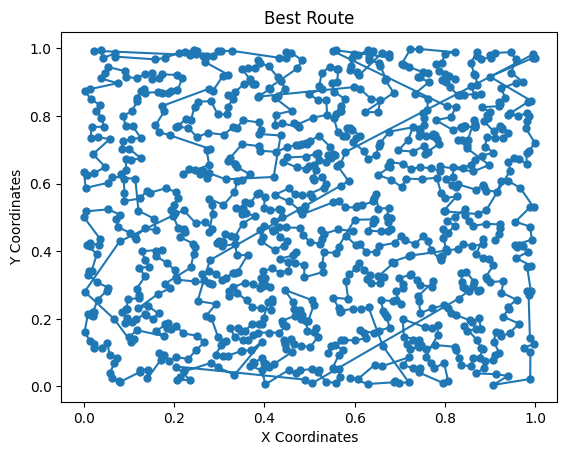

Best route found: [926, 682, 782, 585, 580, 574, 220, 687, 126, 839, 246, 150, 665, 555, 375, 547, 101, 361, 808, 100, 182, 296, 333, 120, 771, 402, 586, 943, 29, 783, 444, 794, 53, 729, 691, 376, 770, 824, 93, 939, 866, 233, 637, 670, 937, 34, 343, 613, 743, 530, 323, 646, 876, 377, 634, 896, 761, 71, 685, 550, 24, 374, 928, 261, 329, 963, 437, 139, 244, 519, 295, 44, 899, 987, 242, 128, 551, 368, 265, 460, 326, 369, 413, 167, 680, 470, 777, 852, 412, 653, 727, 535, 335, 845, 946, 560, 188, 596, 658, 373, 80, 951, 110, 599, 410, 77, 819, 311, 131, 875, 592, 478, 132, 947, 855, 829, 394, 135, 462, 365, 754, 59, 804, 367, 614, 920, 310, 152, 953, 932, 773, 693, 630, 865, 694, 247, 779, 705, 858, 172, 63, 439, 812, 591, 114, 863, 944, 52, 960, 622, 27, 900, 168, 57, 885, 330, 902, 289, 818, 384, 189, 156, 505, 252, 266, 67, 997, 517, 608, 436, 833, 268, 790, 565, 466, 730, 840, 121, 358, 11, 496, 76, 755, 455, 380, 225, 288, 571, 497, 457, 17, 559, 821, 662, 226, 469, 972, 767, 123, 142,

In [39]:
# This time we set the number of particles to be 100 to see the effect of large population
# and particles to be 20 


num_particles = 100                 # Setting the number of populations 
max_iterations = 100               # Setting the number of iterations
inertia_weight = 0.7               # Setting the inertia weight
cognitive_weight = 1.5             # Setting the Cognitive weight
social_weight = 1.5                # Setting the social weight
crowding_factor = 10               # parameter to control the strength of crowding


# Using PSO algo with using random intializing to see how much of differnt it will make to our algorithm output
best_route, best_distance = pso_tsp(num_particles, max_iterations, inertia_weight, cognitive_weight, social_weight,crowding_factor,"nearest_neighbor")

# Plot the best route
xs = [cities[i][0] for i in best_route]
ys = [cities[i][1] for i in best_route]

plt.plot(xs, ys, 'o-', markersize=5)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title('Best Route')
plt.show()

print("Best route found:", best_route)
print("Distance of the best route:", best_distance)